In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from urllib import request

%matplotlib inline

# Dataset da FCPC

Base de dados de pagamentos a pessoas físicas da Fundação Cearense de Pesquisa e Cultura

fonte: http://www.fcpc.ufc.br/AcessoInformacao/PagamentoPessoaFisica

In [2]:
FILEPATH_FCPC = "data/fisica.csv"

# Contando projetos

#### Python puro

In [3]:
with open(FILEPATH_FCPC) as f:
    
    content = f.readlines()
    
content[:4]

['cpf,nome,tipo_pagamento,projeto,data,valor,filename\n',
 '***.000.103-**,REGILDA RODRIGUES DE SOUSA,ADIANTAMENTO PARA VIAGENS,2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO,2010-11-22,240.0,2010.csv\n',
 '***.000.103-**,REGILDA RODRIGUES DE SOUSA,ADIANTAMENTO PARA VIAGENS,2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO,2010-10-15,180.0,2010.csv\n',
 '***.000.103-**,REGILDA RODRIGUES DE SOUSA,ADIANTAMENTO PARA VIAGENS,2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO,2010-08-18,180.0,2010.csv\n']

In [4]:
projetos = [row.split(',')[3] for row in content]

In [5]:
projetos[3:6]

['2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO',
 '2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO',
 '2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO']

In [6]:
from collections import Counter

counts = Counter(projetos)

counts.most_common(5)

[('2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012',
  13068),
 ('2619 - CT - UFC/FCPC - CURSOS DE GRADUACAO UAB - 5º E 6º SEMESTRES', 5284),
 ('2390 - CT - UFC/FCPC - OFERTA DOS CURSOS DE GRADUAÇÃO DA UAB 3º E 4º SEMESTRES',
  4760),
 ('2212 - CT - UFC/FCPC -ACOES REFERENTES AO 1º E 2º SEMESTRES', 4720),
 ('0101 - FCPC', 4591)]

#### Pandas

In [7]:
fcpc = pd.read_csv(FILEPATH_FCPC)

fcpc.head(3)

,cpf,nome,tipo_pagamento,projeto,data,valor,filename
0,***.000.103-**,REGILDA RODRIGUES DE SOUSA,ADIANTAMENTO PARA VIAGENS,2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO,2010-11-22,240.0,2010.csv
1,***.000.103-**,REGILDA RODRIGUES DE SOUSA,ADIANTAMENTO PARA VIAGENS,2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO,2010-10-15,180.0,2010.csv
2,***.000.103-**,REGILDA RODRIGUES DE SOUSA,ADIANTAMENTO PARA VIAGENS,2213 - CT - UFC/FCPC - PROJETO PROJOVEM CAMPO,2010-08-18,180.0,2010.csv


In [60]:
fcpc['data'] = pd.to_datetime(fcpc.data, format="%Y-%m-%d")

In [8]:
fcpc.describe()

,valor
count,126680.000000
mean,1660.480522
std,3492.489457
min,0.000000
25%,177.000000
50%,400.000000
75%,2143.220000
max,328428.650000


In [9]:
fcpc.describe(include = ['O'])

,cpf,nome,tipo_pagamento,projeto,data,filename
count,126680,126680,126680,126679,126680,126680
unique,16215,17623,12,916,1774,8
top,***.501.533-**,FRANCISCO RODRIGO PORTO CAVALCANTI,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2015-04-20,2014.csv
freq,259,259,43521,13068,699,22143


In [10]:
fcpc.tipo_pagamento.value_counts()

ADIANTAMENTO PARA VIAGENS                   43521
SERVIÇO PRESTADO - RPA                      33432
FOLHA DE PAGAMENTO - CLT                    25676
ADIANTAMENTO PARA DESPESAS                  15570
BOLSA                                        5401
DIÁRIAS                                      1917
SERVIÇOS DE TERCEIROS - PESSOA FÍSICA         570
RESSARCIMENTO DE DESPESA                      560
ADIANTAMENTOS                                  18
RECURSOS HUMANOS                               11
DEVOLUÇÃO                                       2
RESSARCIMENTO de DESPESA [ressarcimento]        2
Name: tipo_pagamento, dtype: int64

In [11]:
largest_projetos = fcpc.projeto.value_counts().nlargest(5)
largest_projetos

2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012    13068
2619 - CT - UFC/FCPC - CURSOS DE GRADUACAO UAB - 5º E 6º SEMESTRES                      5284
2390 - CT - UFC/FCPC - OFERTA DOS CURSOS DE GRADUAÇÃO DA UAB 3º E 4º SEMESTRES          4760
2212 - CT - UFC/FCPC -ACOES REFERENTES AO 1º E 2º SEMESTRES                             4720
0101 - FCPC                                                                             4591
Name: projeto, dtype: int64

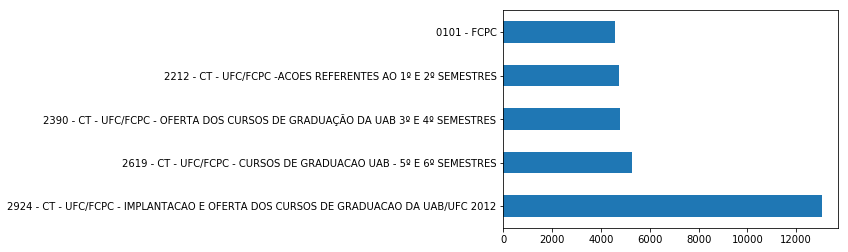

In [12]:
largest_projetos.plot(kind='barh')

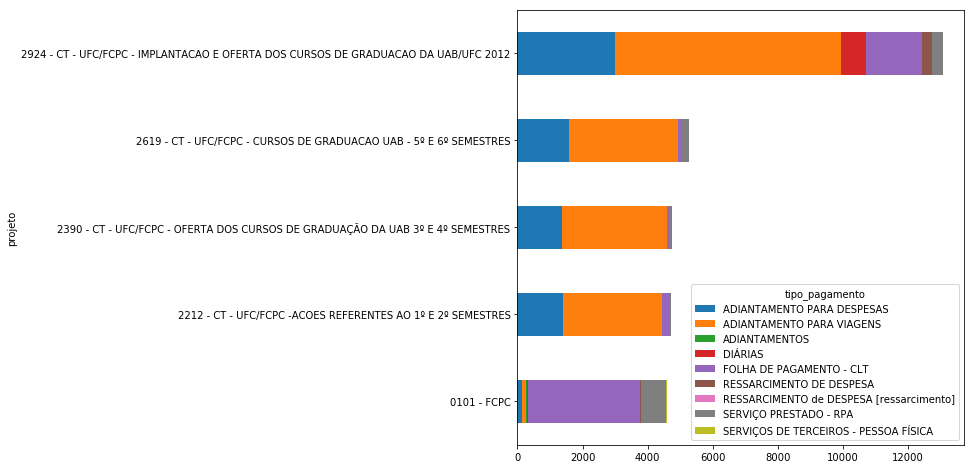

In [13]:
fcpc[fcpc.projeto.isin(largest_projetos.index)].groupby(['projeto', 'tipo_pagamento']).size().unstack()\
.plot(kind = 'barh', stacked = True, figsize = (8, 8))

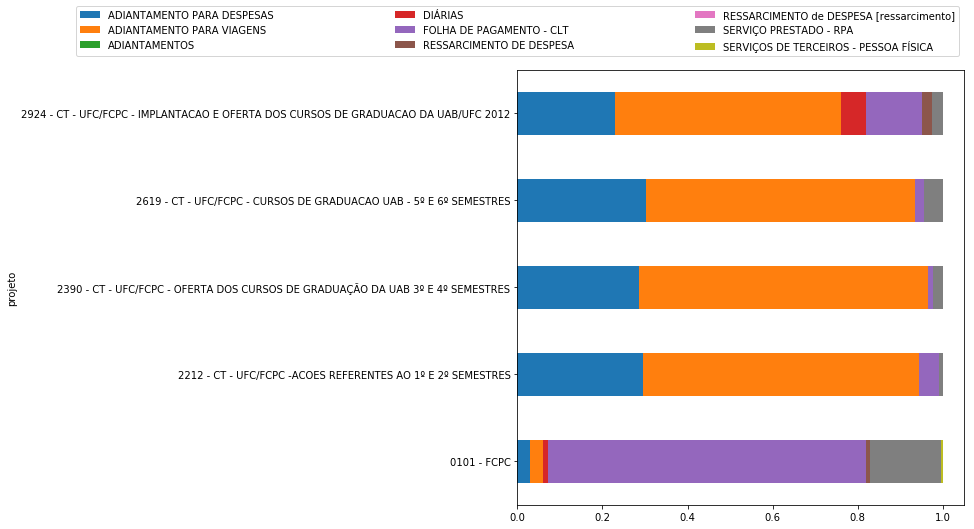

In [14]:
count_subset = fcpc[fcpc.projeto.isin(largest_projetos.index)].groupby(['projeto', 'tipo_pagamento']).size().unstack()
normed_subset = count_subset.div(count_subset.sum(axis = 1), axis = 0)

normed_subset.plot(kind = 'barh', stacked = True, figsize = (8, 8))

plt.legend(bbox_to_anchor = (-1., 1.02, 2., .102), ncol = 3, mode = "expand", loc = 3)

# Dataset de servidores da UFC

Dataset gerado a partir dos dados de cadastro e de remuneração de servidores públicos federais, de fevereirod de 2017.

Fonte: http://portaldatransparencia.gov.br/downloads/servidores.asp

Consulta por servidor: http://portaldatransparencia.gov.br/servidores/Servidor-ListaServidores.asp

In [15]:
FILEPATH_UFC = "data/remuneracao_ufc_20170228"

In [16]:
ufc = pd.read_csv(FILEPATH_UFC, decimal=",")

In [17]:
ufc[ufc.nome == 'ABELARDO VIEIRA MOTA'].T

,2325
cargo,ANALISTA DE TEC DA INFORMACAO
funcao,NaN
uorg_lotacao,DIVISAO DE SISTEMAS DE INFORMACAO
uorg_exercicio,DIVISAO DE SISTEMAS DE INFORMACAO
org_lotacao,UNIVERSIDADE FEDERAL DO CEARA
org_exercicio,UNIVERSIDADE FEDERAL DO CEARA
jornada,40 HORAS SEMANAIS
remuneracao_basica_bruta,4513.12
remuneracao_pos_deducao,3749.06
nome,ABELARDO VIEIRA MOTA


In [18]:
# mantenho apenas um vínculo por servidor
ufc = ufc.drop_duplicates("nome")

In [19]:
ufc.nlargest(5, "remuneracao_basica_bruta", keep="first")

,cargo,funcao,uorg_lotacao,uorg_exercicio,org_lotacao,org_exercicio,jornada,remuneracao_basica_bruta,remuneracao_pos_deducao,nome
1972,PROFESSOR DO MAGISTERIO SUPERIOR,NaN,DEPARTAMENTO DE TEORIA E PRAT DO ENSINO,DEPARTAMENTO DE TEORIA E PRAT DO ENSINO,UNIVERSIDADE FEDERAL DO CEARA,UNIVERSIDADE FEDERAL DO CEARA,DEDICACAO EXCLUSIVA,44341.22,24179.12,LUIZ BOTELHO ALBUQUERQUE
6438,PROFESSOR DO MAGISTERIO SUPERIOR,NaN,NaN,GABINETE DO REITOR,UNIVERSIDADE FEDERAL DO CEARA,UNIVERSIDADE FEDERAL DO CEARA,DEDICACAO EXCLUSIVA,43824.33,30163.89,SEBASTIAO CARNEIRO DE ALMEIDA
2031,MEDICO-AREA,NaN,NaN,DIRETORIA ADMINISTRATIVA/HUWC,UNIVERSIDADE FEDERAL DO CEARA,UNIVERSIDADE FEDERAL DO CEARA,20 HORAS SEMANAIS,43535.89,25327.54,HENRY DE HOLANDA CAMPOS
4688,NaN,FUNCAO GRATIFICADA,MATERNIDADE ESCOLA ASSIS CHATEAUBRIAND,NaN,UNIVERSIDADE FEDERAL DO CEARA,EMPRESA BRAS. DE SERVICOS HOSPITALARES,40 HORAS SEMANAIS,42643.56,23203.95,CARLOS AUGUSTO ALENCAR JUNIOR
1923,PROFESSOR DO MAGISTERIO SUPERIOR,NaN,NaN,COORDENADORIA DE ADM DE PESSOAL,UNIVERSIDADE FEDERAL DO CEARA,UNIVERSIDADE FEDERAL DO CEARA,DEDICACAO EXCLUSIVA,40946.95,23730.87,BOANERGES FREIRE DE AQUINO


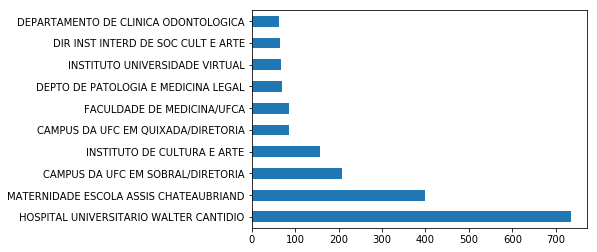

In [20]:
ufc.uorg_lotacao.value_counts().nlargest(10).plot(kind='barh')

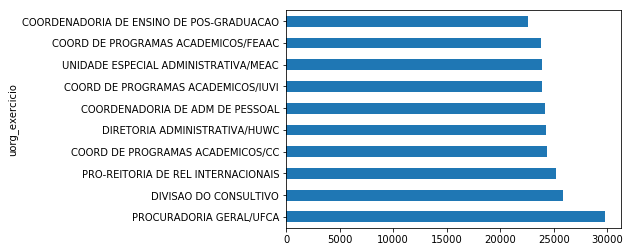

In [21]:
ufc.groupby("uorg_exercicio").remuneracao_basica_bruta.mean().nlargest(10).plot(kind='barh')

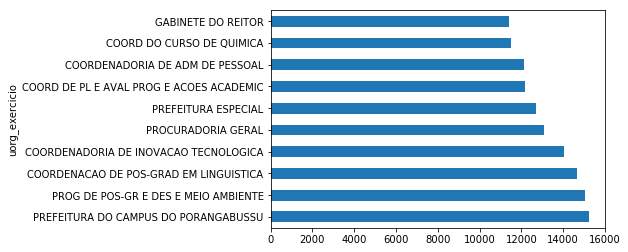

In [50]:
ufc.groupby("uorg_exercicio").remuneracao_basica_bruta.std().nlargest(10).plot(kind='barh')

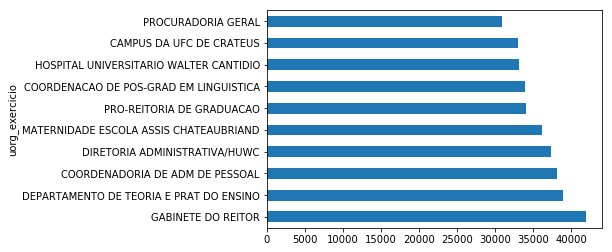

In [22]:
ufc.groupby("uorg_exercicio").remuneracao_basica_bruta.apply(lambda g: g.max() - g.min()).nlargest(10).plot(kind='barh')

In [90]:
df = pd.merge(ufc, fcpc, left_on = "nome", right_on = "nome", how = "outer", indicator = True)

In [91]:
df.shape

(131611, 17)

In [92]:
df._merge.value_counts()

right_only    112095
both           14585
left_only       4931
Name: _merge, dtype: int64

In [93]:
fcpcufc = df[df._merge == "both"]

In [94]:
fcpcufc.groupby("nome").valor.sum().nlargest(10)

nome
JAVAM DE CASTRO MACHADO               802283.12
LUIZ ROBERTO DE OLIVEIRA              665245.29
FRANCISCO RODRIGO PORTO CAVALCANTI    606908.99
ROSSANA MARIA DE CASTRO ANDRADE       594043.50
HELANO DE SOUSA CASTRO                579292.22
LUIS PARENTE MAIA                     563431.94
RICARDO JARDEL NUNES DA SILVEIRA      511934.98
ANTONIO SERGIO BEZERRA SOMBRA         465700.00
PAULO CESAR CORTEZ                    440370.45
JOSE GILVAN RODRIGUES MAIA            430281.30
Name: valor, dtype: float64

In [95]:
fcpcufc[fcpcufc.uorg_lotacao == 'DIVISAO DE SISTEMAS DE INFORMACAO'].groupby("nome").valor.sum().nlargest(10)

nome
FRANCISCO DANIEL COUTINHO MEDEIROS     235811.94
DANILO LEAL MACIEL                     196145.22
DEBORA CUNHA DE SOUSA                   29199.62
MANOEL FIUZA LIMA JUNIOR                27146.67
MARCIO ROBERTT DE ANCHIETA LOUREIRO     21505.90
FABIANO JOSE GADELHA DE FREITAS         18054.96
LUIS CESAR MARQUES DE VASCONCELOS        6596.00
SILVIO ROBERTO MARTINS AMARANTE          6596.00
TIAGO MALVEIRA CAVALCANTE                4916.54
GABRIEL BRITO DOS SANTOS                 4593.91
Name: valor, dtype: float64

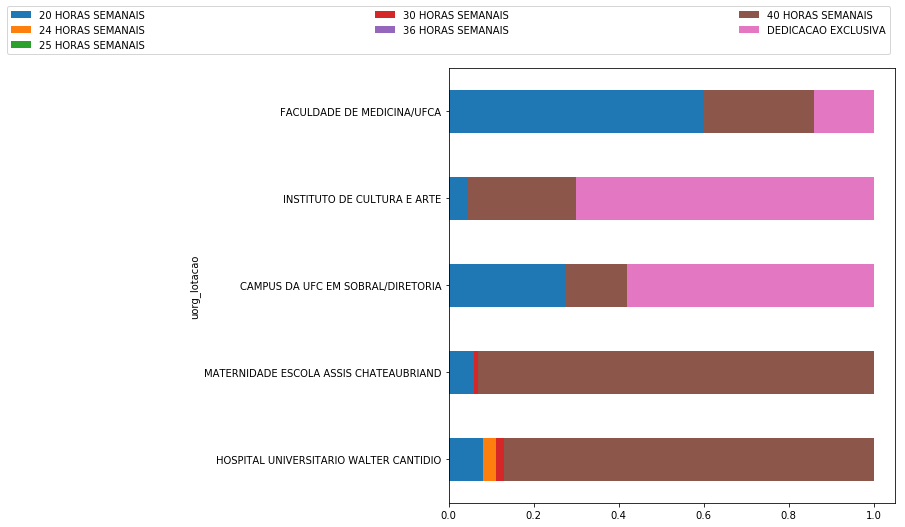

In [45]:
pt = fcpcufc.pivot_table("nome", "uorg_lotacao", "jornada", aggfunc="count").fillna(0)

count_subset = pt.loc[pt.sum(axis = 1).sort_values(ascending = False).index, :].head(5)

normed_subset = count_subset.div(count_subset.sum(axis = 1), axis = 0)

normed_subset.plot(kind = 'barh', stacked = True, figsize = (8, 8))

plt.legend(bbox_to_anchor = (-1., 1.02, 2., .102), ncol = 3, mode = "expand", loc = 3)

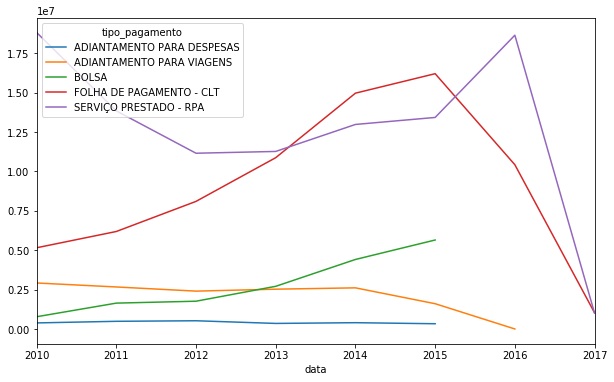

In [83]:
top_5_pagamentos = fcpc.tipo_pagamento.value_counts().nlargest(5)

fcpc[fcpc.tipo_pagamento.isin(top_5_pagamentos.index)].pivot_table("valor", fcpc.data.dt.year, "tipo_pagamento", aggfunc="sum")\
.plot(figsize = (10, 6))

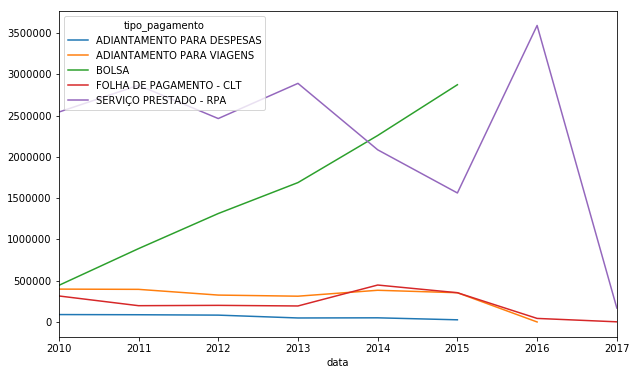

In [96]:
top_5_pagamentos = fcpcufc.tipo_pagamento.value_counts().nlargest(5)

fcpcufc[fcpcufc.tipo_pagamento.isin(top_5_pagamentos.index)].pivot_table("valor", fcpcufc.data.dt.year, "tipo_pagamento", aggfunc="sum")\
.plot(figsize = (10, 6))

In [ ]:
df.rename_axis()

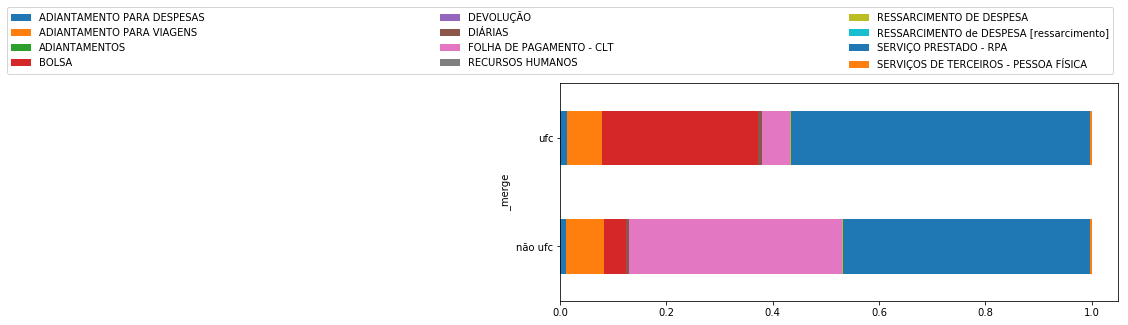

In [132]:
dist_tipo_pag = df.groupby(["_merge", "tipo_pagamento"]).valor.sum().unstack()\
.rename_axis({"right_only": "não ufc", "both": "ufc"})

dist_tipo_pag_prop = dist_tipo_pag.div(dist_tipo_pag.sum(axis = 1), axis = 0).fillna(0)

dist_tipo_pag_prop.plot(kind = "barh", stacked = True, figsize = (10, 4))

plt.legend(bbox_to_anchor = (-1., 1.02, 2., .102), ncol = 3, mode = "expand", loc = 3)